### *Каменчук Виктория, гр.ПИ19-1*

1. Загрузите и прочитайте в pandas следующий датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится, необходимо его обработать.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = './data/cars_sampled.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


2. Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [4]:
df.info() #размер, тип данных, названия столбцов, кол-во непустых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
#отдельно кол-во пустых значении
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [6]:
df.describe() #описательная статистика числовых столбцов

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
df.select_dtypes(include='object').count()

dateCrawled          50001
name                 50001
seller               50001
offerType            50001
abtest               50001
vehicleType          44813
gearbox              47177
model                47243
fuelType             45498
brand                50001
notRepairedDamage    40285
dateCreated          50001
lastSeen             50001
dtype: int64

In [8]:
df.select_dtypes(include='object').isna().sum()  #подсчитаем значения nan

dateCrawled             0
name                    0
seller                  0
offerType               0
abtest                  0
vehicleType          5188
gearbox              2824
model                2758
fuelType             4503
brand                   0
notRepairedDamage    9716
dateCreated             0
lastSeen                0
dtype: int64

In [9]:
# уникальные значения columns с типом object
for col in df.select_dtypes(include='object').columns:
  print(f'***\n{col} => {df[col].unique()}\n***\n')

***
dateCrawled => ['30/03/2016 13:51' '7/3/2016 9:54' '1/4/2016 0:57' ... '24/03/2016 18:31'
 '17/03/2016 6:32' '20/03/2016 8:52']
***

***
name => ['Zu_verkaufen' 'Volvo_XC90_2.4D_Summum' 'Volkswagen_Touran' ...
 '[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift___Xenon_evtl._Cabrio'
 'Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten'
 'Chevrolet_Matiz_1.Hd_TÜV11/2017']
***

***
seller => ['private' 'commercial']
***

***
offerType => ['offer' 'request']
***

***
abtest => ['test' 'control']
***

***
vehicleType => ['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' nan 'others'
 'cabrio']
***

***
gearbox => ['manual' 'automatic' nan]
***

***
model => ['3er' 'xc_reihe' 'touran' 'ibiza' 'passat' 'astra' 'clk' 'vectra'
 'octavia' 'a_klasse' 'yaris' 'meriva' nan 'others' 'golf' '3_reihe'
 'carisma' 'colt' '80' 'panda' 'micra' '156' 'c_klasse' 'polo' '1er' 'ka'
 'e_klasse' 'freelander' 'a4' 'almera' 'forester' 'cooper' '5er' 'a3'
 'grand' 'voyager' 'fiesta' 'clio' 'cordoba' 'slk' 'berl

3 Поработайте с типами переменных. Все числовые значения переведите
в формат int.

In [10]:
df.select_dtypes(include=np.number).dtypes      # все числовые значения в формате int

price                  int64
yearOfRegistration     int64
powerPS                int64
kilometer              int64
monthOfRegistration    int64
postalCode             int64
dtype: object

4 Поработайте со столбцом price. Постройте гистограмму, найдите
выбросы (ящиковая диаграмма), удалите аномальные значения,
постарайтесь привести к нормальному распределению.

<AxesSubplot:>

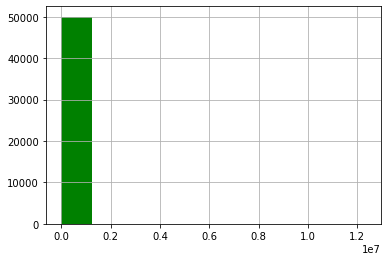

In [11]:
df.price.hist(color='green') # гистограмма

<AxesSubplot:>

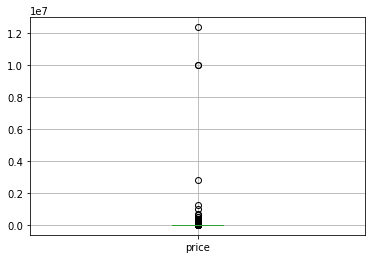

In [12]:
df.boxplot(column='price') # выбросы

<AxesSubplot:>

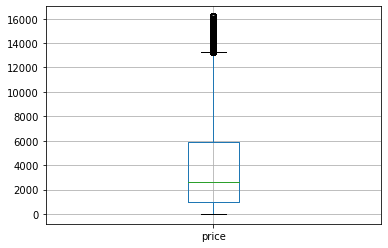

In [13]:
# будем выкидывать выбросы по принципу квартилей
Q1 =  df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < price < @Q3 + 1.5*@IQR")
df.boxplot(column="price")

<AxesSubplot:>

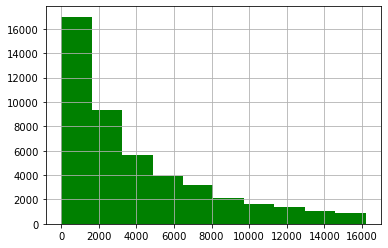

In [14]:
df.price.hist(color='green') # гистограмма после удаления выбросов

In [15]:
# нормализация
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


<AxesSubplot:>

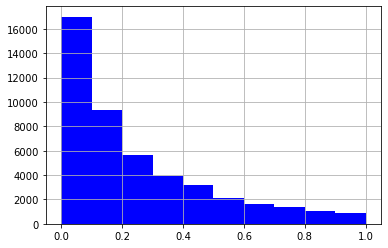

In [16]:
df['price'] = NormalizeData(df.price)

df.price.hist(color='blue') 

5 Аналогично поработайте и с другими «важными для целевой функции
price» параметрами (powerPS, yearOfRegistration, kilometer и т.д).
«Важность» докажите через коэффициент корреляции. Сделайте
визуализацию.

<AxesSubplot:>

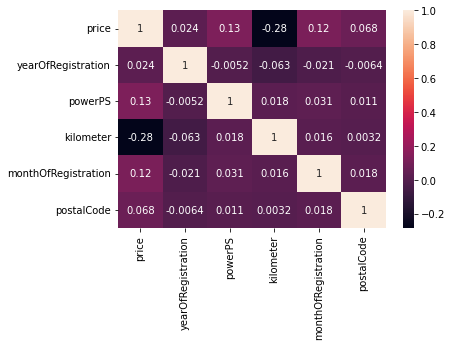

In [17]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

# в целом, факторы слабо коррелируют с целевой функцией price
# но можно попробовать поработать monthOfRegistration и kilometer

<AxesSubplot:>

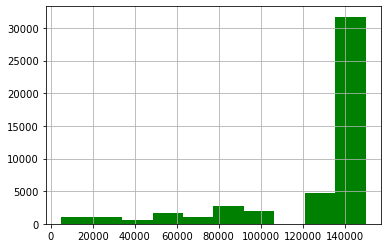

In [18]:
df.kilometer.hist(color='green') # гистограмма

<AxesSubplot:>

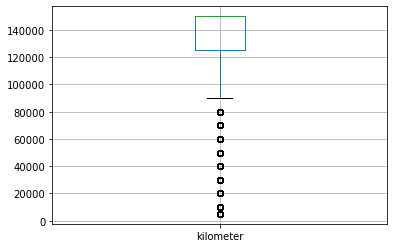

In [19]:
df.boxplot(column='kilometer') # выбросы

<AxesSubplot:>

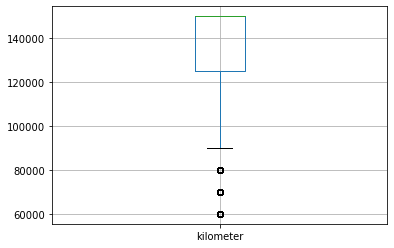

In [20]:
df = df.query("50_000 < kilometer") #"обрежем" выбросы
df.boxplot(column="kilometer")

<AxesSubplot:>

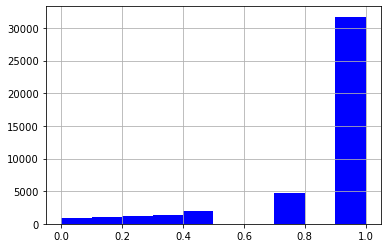

In [21]:
# нормализация
df['kilometer'] = NormalizeData(df.kilometer)

df.kilometer.hist(color='blue') 

<AxesSubplot:>

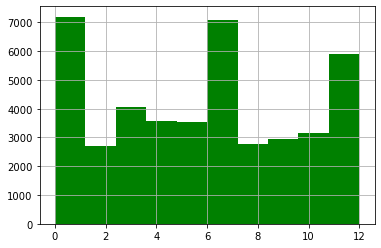

In [22]:
df.monthOfRegistration.hist(color='green') # гистограмма

<AxesSubplot:>

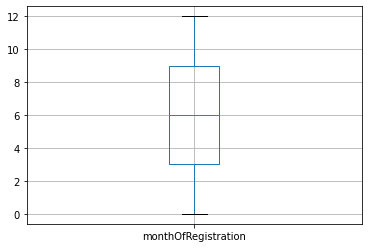

In [23]:
df.boxplot(column='monthOfRegistration') # выбросы, а точнее их отсутствие

Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

<AxesSubplot:xlabel='gearbox', ylabel='price'>

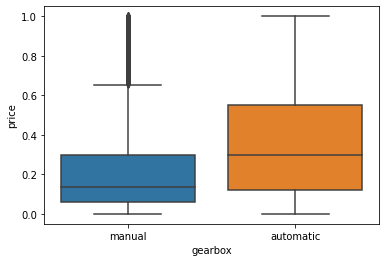

In [24]:
sns.boxplot(x=df["gearbox"], y=df["price"])

# Дороже в среднем автомобили с автомат. коробкой передач (automatic)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='price'>

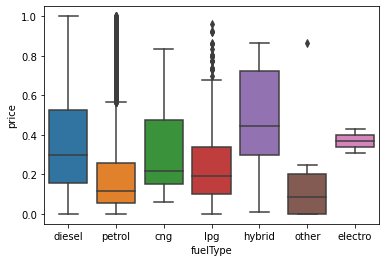

In [25]:
sns.boxplot(df['fuelType'], df['price'] )

# Дороже в среднем автомобили гибирды(hybrid), дешевле бензин (petrol)
# и есть инересный other

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


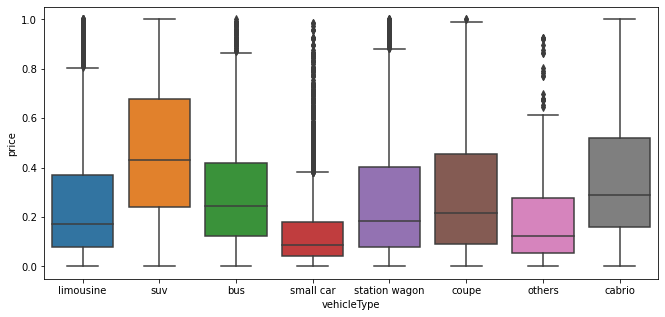

In [26]:
ax = sns.boxplot(df['vehicleType'], df['price'])
ax.figure.set_size_inches(11, 5)

# small cars самые дешевые (очевидно), suv (Sport Utility Vehicle, внедорожники)- самые дорогие

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

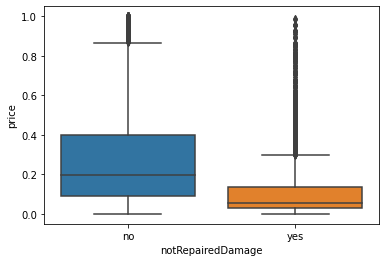

In [27]:
sns.boxplot(df['notRepairedDamage'], df['price'])

# тоже вполне очевидный результат, автобили с повреждениями (yes), причем невостановленными, стоят дешевле

Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [28]:
df.shape

(42961, 19)

In [29]:
re = df.columns[df.isna().sum() > 0]
df[re].isna().sum()

vehicleType          4551
gearbox              2284
model                2229
fuelType             3849
notRepairedDamage    8692
dtype: int64

In [30]:
# notRepairedDamage пропущено почти 9 тыс. значений, что 20%. Поэтому удалю. 
# модель по медиане восстановить в данном случае сложно, т.к. ответ может быть неочевидным (по факту, близко к уникальным значениям). 
# Поэтому модели я тоже удалю
df = df.drop(columns=["notRepairedDamage", "model"]) # удаление столбцов с большиим кол-вом выбросов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42961 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          42961 non-null  object 
 1   name                 42961 non-null  object 
 2   seller               42961 non-null  object 
 3   offerType            42961 non-null  object 
 4   price                42961 non-null  float64
 5   abtest               42961 non-null  object 
 6   vehicleType          38410 non-null  object 
 7   yearOfRegistration   42961 non-null  int64  
 8   gearbox              40677 non-null  object 
 9   powerPS              42961 non-null  int64  
 10  kilometer            42961 non-null  float64
 11  monthOfRegistration  42961 non-null  int64  
 12  fuelType             39112 non-null  object 
 13  brand                42961 non-null  object 
 14  dateCreated          42961 non-null  object 
 15  postalCode           42961 non-null 

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


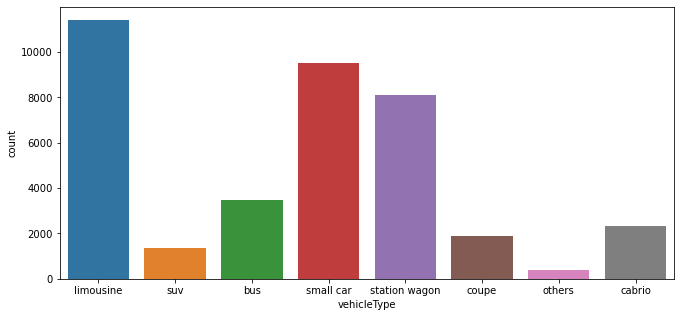

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


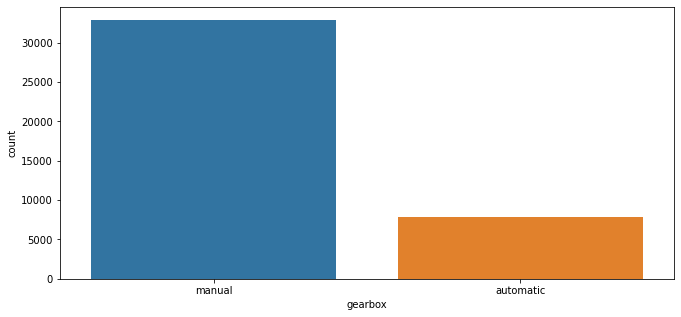

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


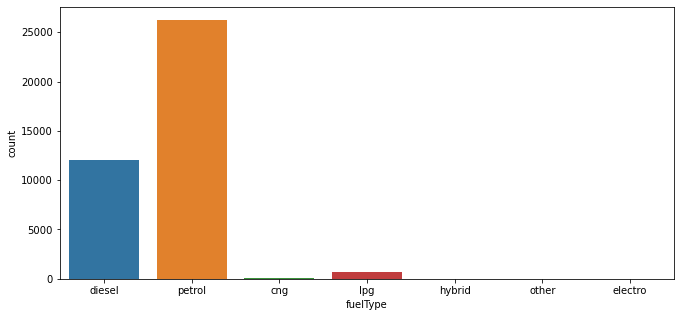

In [31]:
re = df.columns[df.isna().sum() > 0] # обновим список, т.к. два столбца удалили уже
for column in re:
    ax= sns.countplot(df[column])
    ax.figure.set_size_inches(11, 5)
    plt.show()

In [32]:
# заменим nan на моду, это в данном случае вполне возможно 
for column in re:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [33]:
df.isna().sum() # прекрасный результат

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

Сохраните полученный датасет и выведете его.

In [34]:
df.to_csv("./result.csv")

In [35]:
df_result = pd.read_csv("./result.csv", index_col = 0)
df_result.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,0.274691,test,limousine,2003,manual,150,1.0,3,diesel,bmw,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,0.820926,control,suv,2005,manual,163,1.0,6,diesel,volvo,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,0.197531,test,bus,2003,manual,101,1.0,11,diesel,volkswagen,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,0.277778,control,small car,2006,manual,86,0.0,12,petrol,seat,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,0.060988,test,limousine,1995,manual,90,1.0,2,petrol,volkswagen,2/4/2016 0:00,26826,2/4/2016 12:51


In [36]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42961 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          42961 non-null  object 
 1   name                 42961 non-null  object 
 2   seller               42961 non-null  object 
 3   offerType            42961 non-null  object 
 4   price                42961 non-null  float64
 5   abtest               42961 non-null  object 
 6   vehicleType          42961 non-null  object 
 7   yearOfRegistration   42961 non-null  int64  
 8   gearbox              42961 non-null  object 
 9   powerPS              42961 non-null  int64  
 10  kilometer            42961 non-null  float64
 11  monthOfRegistration  42961 non-null  int64  
 12  fuelType             42961 non-null  object 
 13  brand                42961 non-null  object 
 14  dateCreated          42961 non-null  object 
 15  postalCode           42961 non-null 

In [37]:
df_result.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,42961.000000,42961.000000,42961.000000,42961.000000,42961.000000,42961.000000
mean,0.235668,2002.747376,109.176160,0.857969,5.739764,50356.193617
std,0.228775,6.875322,194.893565,0.272153,3.722586,25670.111796
min,0.000000,1910.000000,0.000000,0.000000,0.000000,1067.000000
25%,0.061728,1999.000000,69.000000,0.722222,3.000000,30165.000000
50%,0.154321,2003.000000,105.000000,1.000000,6.000000,49134.000000
75%,0.339506,2007.000000,141.000000,1.000000,9.000000,70597.000000
max,1.000000,2019.000000,19312.000000,1.000000,12.000000,99998.000000


### Обучение



In [38]:
def encode_categorial(name_scaler, scaler, data, y = None, return_scaler = False):
    if name_scaler != 'TargetEncoder':
        if not return_scaler:
            return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str)))
        else:
            return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str))), scaler
    else:
        if not return_scaler:
            return scaler.fit_transform(data[categorical_cols], y)
        else:
            return scaler.fit_transform(data[categorical_cols], y), scaler
    
def encode_number(name_scaler, scaler, data, return_scaler = False):
    if name_scaler == 'Not scaled':
        if not return_scaler:
            return data
        else:
            return data, scaler
    else:
        if not return_scaler:
            return scaler.fit_transform(data)
        else:
            return scaler.fit_transform(data), scaler

In [39]:
from sklearn.metrics import r2_score
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [40]:
def get_cols(df) -> list:
    '''
    функция возвращает список категориальных и числовых переменных
    '''
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

In [41]:

scalers_categorial = {'LabelEncoder': LabelEncoder(), 
                     'TargetEncoder': TargetEncoder()}

mls = {
        'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0), 
        'linear': LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(max_depth=15, random_state=0),
        'LassoCV': LassoCV(), 'Ridge': RidgeCV(), 'ElasticNetCV': ElasticNetCV(),
       'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=100, random_state=0)
        }

scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(),
           'RobustScaler': RobustScaler(), 'Normalizer': Normalizer(), 'Not scaled': 0}

mlss = []
X = df.drop(['price', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen', 'name'], axis=1)
y = df['price']

numbers_cols, categorical_cols = get_cols(X)

for idd, (name_ml, ml) in enumerate(mls.items()):
    data = pd.DataFrame()
    for ide, (name_scaler_categorial, scaler_categorial) in enumerate(scalers_categorial.items()):
        data[categorical_cols] = encode_categorial(name_scaler_categorial, scaler_categorial, X[categorical_cols], y)
        
        for name_scaler, scaler in scalers.items():
            for name in numbers_cols:
                data[name] = 0
            
            data[numbers_cols] = encode_number(name_scaler, scaler, X[numbers_cols])

            
            X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42, shuffle = True)
        
            model = ml.fit(X_train, y_train)
    
            mlss.append([name_ml, name_scaler_categorial, name_scaler, round(model.score(X_test, y_test),3)])

/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [42]:
sorted(mlss, key = lambda x: x[3], reverse = True)

[['RandomForestRegressor', 'TargetEncoder', 'StandardScaler', 0.787],
 ['RandomForestRegressor', 'TargetEncoder', 'MinMaxScaler', 0.787],
 ['RandomForestRegressor', 'TargetEncoder', 'RobustScaler', 0.787],
 ['RandomForestRegressor', 'TargetEncoder', 'Not scaled', 0.787],
 ['RandomForestRegressor', 'LabelEncoder', 'StandardScaler', 0.782],
 ['RandomForestRegressor', 'LabelEncoder', 'MinMaxScaler', 0.782],
 ['RandomForestRegressor', 'LabelEncoder', 'RobustScaler', 0.782],
 ['RandomForestRegressor', 'LabelEncoder', 'Not scaled', 0.782],
 ['GradientBoostingRegressor', 'TargetEncoder', 'StandardScaler', 0.771],
 ['GradientBoostingRegressor', 'TargetEncoder', 'MinMaxScaler', 0.771],
 ['GradientBoostingRegressor', 'TargetEncoder', 'RobustScaler', 0.771],
 ['GradientBoostingRegressor', 'TargetEncoder', 'Not scaled', 0.771],
 ['GradientBoostingRegressor', 'LabelEncoder', 'StandardScaler', 0.765],
 ['GradientBoostingRegressor', 'LabelEncoder', 'MinMaxScaler', 0.765],
 ['GradientBoostingRegressor

Поиск оптимальных гиперпараметров

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
            
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42, shuffle = True)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 50, num = 15)]
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
hyperparameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


regressor = RandomForestRegressor(verbose=1)
search = RandomizedSearchCV(regressor, hyperparameter_grid, 
                            cv=3, n_jobs = -1,scoring='r2')
search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 715 out of 715 | elapsed:    0.4s finished
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:   54.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:   41.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done 952 out of 952 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(verbose=1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 4, 8, 11, 15, 18, 22,
                                                      25, 29, 32, 36, 39, 43,
                                                      46, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   scor

In [75]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 43}

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

regressor = RandomForestRegressor(n_estimators=1000, min_samples_split = 3,
                                  min_samples_leaf = 2, max_features='log2', 
                                  max_depth = 43, n_jobs = -1)

pipe = Pipeline([('encoder', TargetEncoder()), 
                 ('scaler', StandardScaler()),
                 ('regressor', regressor)])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.7941051800738408

Подкрутим вручную

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

regressor = RandomForestRegressor(n_estimators=1000, min_samples_split = 3,
                                  min_samples_leaf = 2, max_features='log2', 
                                  max_depth = 60, n_jobs = -1)

pipe = Pipeline([('encoder', TargetEncoder()), 
                 ('scaler', StandardScaler()),
                 ('regressor', regressor)])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.7944124392657056

Попробую улучшить

In [81]:
X_ = X.copy()
X_['y'] = y

In [82]:
numbers_cols, categorical_cols = get_cols(X_)
X_[categorical_cols] = encode_categorial('TargetEncoder', scaler_categorial, X_[categorical_cols], y)

In [83]:
X_.corr()

,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,y
seller,1.000000,-0.000047,-0.000221,0.003169,-0.000251,0.003213,0.003157,-0.003561,-0.005976,0.004368,0.002223,0.005924
offerType,-0.000047,1.000000,0.006606,-0.006062,-0.001739,0.003213,0.003822,-0.003561,0.009604,0.004368,-0.004410,0.007029
abtest,-0.000221,0.006606,1.000000,0.003400,-0.004087,-0.005529,0.000882,0.002747,0.000763,0.002885,0.007320,0.003504
vehicleType,0.003169,-0.006062,0.003400,1.000000,0.017167,0.163396,0.117882,0.061814,0.028984,0.229701,0.199027,0.325745
yearOfRegistration,-0.000251,-0.001739,-0.004087,0.017167,1.000000,0.021037,0.029174,-0.162636,0.027758,0.230263,-0.027949,0.348810
gearbox,0.003213,0.003213,-0.005529,0.163396,0.021037,1.000000,0.116137,0.015977,0.045072,0.134753,0.244523,0.259904
powerPS,0.003157,0.003822,0.000882,0.117882,0.029174,0.116137,1.000000,0.020711,0.035070,0.058473,0.132568,0.159121
kilometer,-0.003561,-0.003561,0.002747,0.061814,-0.162636,0.015977,0.020711,1.000000,-0.033131,0.138892,0.086983,-0.305043
monthOfRegistration,-0.005976,0.009604,0.000763,0.028984,0.027758,0.045072,0.035070,-0.033131,1.000000,0.090392,0.040453,0.108106
fuelType,0.004368,0.004368,0.002885,0.229701,0.230263,0.134753,0.058473,0.138892,0.090392,1.000000,0.134623,0.336279


In [85]:
# уберу совсем незначимые переменные
X_ = X.drop(['seller', 'offerType', 'abtest'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42, shuffle = True)

regressor = RandomForestRegressor(n_estimators=1000, min_samples_split = 3,
                                  min_samples_leaf = 2, max_features='log2', 
                                  max_depth = 60, n_jobs = -1)

pipe = Pipeline([('encoder', TargetEncoder()), 
                 ('scaler', StandardScaler()),
                 ('regressor', regressor)])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.8023596169817008